In [1]:
import pandas as pd
import seaborn as srn
import statistics  as sts

In [2]:
#importar os dados da  tabela
dataset = pd.read_csv("Churn.csv", sep=";")

In [3]:
#visualizando os dados
dataset.head()


,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
#tamanho(linha e coluna)
dataset.shape


(999, 12)

In [5]:
#renomeando as colunas
dataset.columns = ["Id","Score","Estado","Genero","Idade","Patrimonio","Saldo","Produtos","TemCartCredito",
                    "Ativo","Salario","Saiu"]

In [6]:
#visualizando a modificação
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [7]:
dataset.describe()

,Id,Score,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
count,999.000000,999.000000,999.000000,999.000000,9.990000e+02,999.000000,999.000000,999.00000,9.920000e+02,999.000000
mean,500.916917,648.621622,38.902903,5.069069,7.164928e+06,1.526527,0.702703,0.50951,3.528762e+07,0.203203
std,288.662884,98.264219,11.401912,2.927691,6.311840e+06,0.574201,0.457297,0.50016,5.305800e+08,0.402584
min,1.000000,376.000000,-20.000000,0.000000,0.000000e+00,1.000000,0.000000,0.00000,9.677000e+03,0.000000
25%,251.500000,580.000000,32.000000,2.000000,0.000000e+00,1.000000,0.000000,0.00000,3.029011e+06,0.000000
50%,501.000000,653.000000,37.000000,5.000000,8.958835e+06,1.000000,1.000000,1.00000,8.703250e+06,0.000000
75%,750.500000,721.000000,44.000000,8.000000,1.258684e+07,2.000000,1.000000,1.00000,1.405213e+07,0.000000
max,1000.000000,850.000000,140.000000,10.000000,2.117743e+07,4.000000,1.000000,1.00000,1.193469e+10,1.000000


In [8]:
#verificando se existe alguma coluna com dados faltantes, NaN
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [9]:
#resolvendo o primeiro problema com dados faltantes, a coluna Genero. Fazendo um agrupamento para verificar qual
#é o genero que mais aparace para substituir nos dados faltantes
dataset.groupby(['Genero']).size()

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [10]:
#existe um outro problema a falta de conformidade nos dados de Genero, deveria ser apenas Feminino ou Masculino.
#Solução: todas os gêneros 'F' e 'Fem' em 'Feminino' e os gêneros 'M' em 'Masculino'
dataset.loc[dataset['Genero'].isin(['F','Fem']),'Genero'] = 'Feminino'

In [11]:
#verificando o resultado
dataset.groupby(['Genero']).size()

Genero
Feminino     464
M              6
Masculino    521
dtype: int64

In [12]:
#fazendo o mesmo processo para 'Masculino'
dataset.loc[dataset['Genero'] == 'M','Genero'] = 'Masculino'

In [13]:
#verificando o resultado
dataset.groupby(['Genero']).size()

Genero
Feminino     464
Masculino    527
dtype: int64

In [14]:
#listando todas as linhas que tem 'Genero' == NaN
dataset.loc[dataset['Genero'].isnull()]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
64,65,603,PR,NaN,26,4,10916637,1,1,1,9284067.0,0
84,86,493,RS,NaN,46,4,0,2,1,0,190766.0,0
213,215,676,RS,NaN,34,1,6309501,1,1,1,4064581.0,0
296,298,714,RS,NaN,31,4,12516926,1,1,1,10663689.0,0
370,372,801,SC,NaN,42,4,14194767,1,1,1,1059829.0,0
501,503,692,RS,NaN,54,5,0,2,1,1,8872184.0,0
963,965,529,SC,NaN,63,4,9613411,3,1,0,10873296.0,1
969,971,649,PR,NaN,70,9,11685471,2,0,1,10712579.0,0


In [15]:
#substituindo os valores faltantes pelo gênero que mais aparace, ou seja, a moda
dataset.loc[dataset['Genero'].isnull(),'Genero'] = 'Masculino'

In [16]:
#verificando o resultado
dataset.groupby(['Genero']).size()

Genero
Feminino     464
Masculino    535
dtype: int64

In [17]:
#outra coluna que tinha dados faltantes é salário, é um dado numérico, logo temos que ter alguns cuidados,
#além de corrigir os dados faltantes temos que verificar se existe salários fora do comum , exemplo, salário 
#negativo,ou com valores forma do normal. E campos com salário vazio vamos colocar calcular e colocar a mediana
#respeitando, levando em consideração o gênero.  
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            0
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [18]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [19]:
#como não existe nenhum valor negativo, vamos substiur os salários faltantes pelas medianas de cada gênero
dataset.loc[dataset['Salario'].isnull()]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
17,18,549,SC,Feminino,24,9,0,2,1,1,NaN,0
52,53,788,RS,Feminino,33,5,0,2,0,0,NaN,0
179,181,754,PR,Feminino,55,3,16160881,1,1,0,NaN,1
330,332,656,RS,Masculino,50,7,0,2,0,1,NaN,0
426,428,492,PR,Masculino,39,10,12457665,2,1,0,NaN,0
550,552,721,PR,Feminino,36,3,6525307,2,1,0,NaN,0
983,985,614,PR,Feminino,35,6,12810028,1,0,0,NaN,1


In [20]:
#calculando a mediana para o gênero feminino
aux = dataset.loc[dataset['Genero']== 'Feminino']
mediana_feminino = sts.median(aux['Salario'])
mediana_feminino
#outra forma de escrever a mesma ação
med_f = sts.median(dataset.loc[dataset['Genero']=='Feminino']['Salario'])

In [21]:
mediana_feminino

16124338.5

In [22]:
med_f 

16124338.5

In [23]:
dataset.loc[dataset['Genero']=='Feminino','Salario']= med_f

In [24]:
#outra forma de escrever a mesma ação
med_m = sts.median(dataset.loc[dataset['Genero']=='Masculino']['Salario'])

In [25]:
dataset.loc[dataset['Genero']=='Masculino','Salario']= med_m

Text(0.5, 1.0, 'Salario')

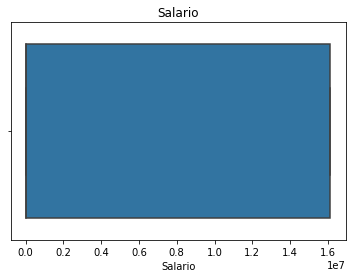

In [26]:
srn.boxplot(dataset['Salario']).set_title('Salario')

Text(0.5, 1.0, 'Salario')

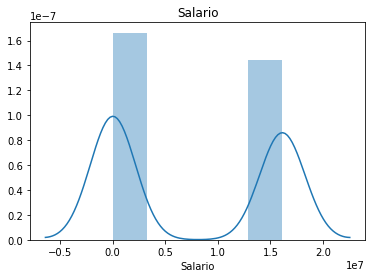

In [27]:
srn.distplot(dataset['Salario']).set_title('Salario')

In [28]:
dataset['Salario'].describe()

count    9.990000e+02
mean     7.500317e+06
std      8.035435e+06
min      2.079200e+04
25%      2.079200e+04
50%      2.079200e+04
75%      1.612434e+07
max      1.612434e+07
Name: Salario, dtype: float64

In [29]:
#todos os campos com valores faltantes foram eliminados 
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            0
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           0
Saiu              0
dtype: int64

In [30]:
#vamos agora analisar a coluna id para verificar se o mesmo dado foi inserido duas vezes
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,16124338.5,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,16124338.5,0


In [31]:
#elimando o dado duplicado
dataset.drop_duplicates(['Id'],keep='first', inplace =  True)


In [32]:
#verificando se eliminou 
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [33]:
dataset['Id'].describe()

count     998.000000
mean      501.337675
std       288.500953
min         1.000000
25%       252.250000
50%       501.500000
75%       750.750000
max      1000.000000
Name: Id, dtype: float64

In [34]:
#verificando se existe algum dado fora do normal (no caso negativo ou um valor fora do escopo)
dataset['Score'].describe()

count    998.000000
mean     648.605210
std       98.312117
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

In [35]:
#verificando a coluna de Estado tem dados corretos
dataset.groupby(['Estado']).size()

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [36]:
#retirando o estado 'TD'
dataset.drop(dataset[dataset['Estado']=='TD'].index,axis = 0,inplace=True)  

In [37]:
dataset.loc[dataset['Estado']=='TD']

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [38]:
#Vamos considerar que houve um erro de digitação e consertar a linha que tem  como estado o RP e colocar PR
dataset.loc[dataset['Estado'] == 'RP', 'Estado'] = 'PR'

In [39]:
dataset.loc[dataset['Estado']=='RP']

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [40]:
#vamos verificar se existe algum dado fora do normal na coluna idade 
dataset['Idade'].describe()

count    997.000000
mean      38.917753
std       11.407972
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [41]:
#foi encontrado duas inconsistência. 1- Idade negativa 2- Idade máxima de 140 anos, Nos dois casos vamos colocar
#o vamor da mediana para essas idades
dataset.loc[dataset['Idade'].isin([-20,140]),'Idade'] = 38

In [42]:
#verificando o resultado
dataset['Idade'].describe()

count    997.000000
mean      38.873621
std       10.788775
min      -10.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

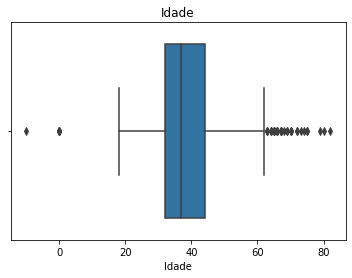

In [43]:
#existe mais idade fora do padrão
#colocando isso no gráfico boxplot
srn.boxplot(dataset['Idade']).set_title('Idade')


In [44]:
#todas as idades que for menor do que 20 vai  receber o valor da mediana das idades
dataset.loc[dataset['Idade'] < 20, 'Idade'] = 38

Text(0.5, 1.0, 'Idade')

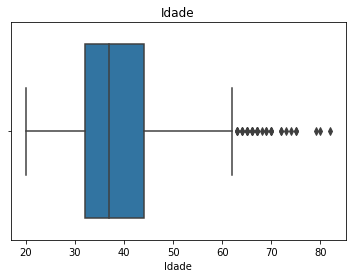

In [45]:
#verificando o resultado
srn.boxplot(dataset['Idade']).set_title('Idade')

In [46]:
#verificando se existe alguma idade diferente de inteiro
dataset['Idade']

0      42
1      41
2      42
3      39
4      43
       ..
994    43
995    29
996    44
997    62
998    28
Name: Idade, Length: 997, dtype: int64

In [47]:
#verificando patrinomio 
dataset['Patrimonio'].describe()

count    997.000000
mean       5.070211
std        2.926318
min        0.000000
25%        2.000000
50%        5.000000
75%        8.000000
max       10.000000
Name: Patrimonio, dtype: float64

Text(0.5, 1.0, 'Patrimonio')

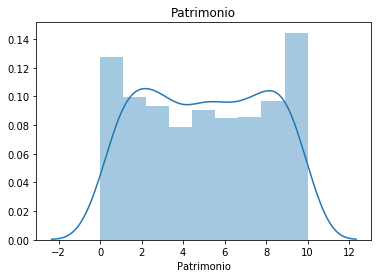

In [48]:
srn.distplot(dataset['Patrimonio']).set_title('Patrimonio')

In [49]:
#Não existe nenhum valor fora do comum para o patrimônio
#verificando saldo
dataset['Saldo'].describe()

count    9.970000e+02
mean     7.169607e+06
std      6.313595e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258850e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Patrimonio')

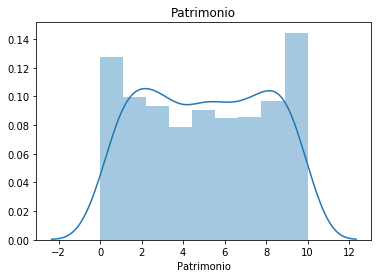

In [50]:
srn.distplot(dataset['Patrimonio']).set_title('Patrimonio')

In [51]:
#Não existe nenhum valor fora do comum para o Saldo
#verificando Produtos
dataset['Produtos'].describe()

count    997.000000
mean       1.525577
std        0.574384
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Produtos, dtype: float64

In [52]:
#verificando distribuição de produto por cliente
dataset.groupby(['Produtos']).size()

Produtos
1    511
2    450
3     34
4      2
dtype: int64

Text(0.5, 1.0, 'Produtos')

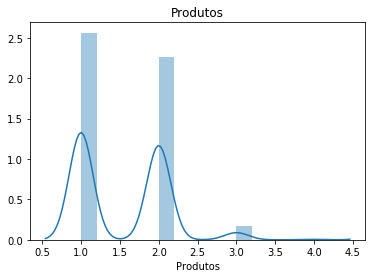

In [53]:
srn.distplot(dataset['Produtos']).set_title('Produtos')

In [54]:
#verificando a coluna que indica se tem cartão de crédito do banco
dataset['TemCartCredito'].describe()

count    997.000000
mean       0.703109
std        0.457117
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: TemCartCredito, dtype: float64

In [55]:
#consideranndo 0 para não e 1 para sim
dataset.groupby(['TemCartCredito']).size()

TemCartCredito
0    296
1    701
dtype: int64

In [56]:
#verificando se o cliente está ativo no banco
dataset['Ativo'].describe()

count    997.000000
mean       0.509529
std        0.500160
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Ativo, dtype: float64

In [57]:
#consideranndo 0 para não e 1 para sim
dataset.groupby(['Ativo']).size()

Ativo
0    489
1    508
dtype: int64

In [58]:
#verificando se o cliente saiu do banco 
dataset['Saiu'].describe()

count    997.000000
mean       0.203611
std        0.402885
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Saiu, dtype: float64

In [59]:
#consideranndo 0 para não e 1 para sim
dataset.groupby(['Saiu']).size()

Saiu
0    794
1    203
dtype: int64

In [60]:
#análise :

#Analisando os clientes que saíram do banco
# 0-Qual a porcentagem que saiu do banco ?
# 1-Qual é a média de idade dos clientes que saíram do banco?
# 2-Qual é o gênero que mais saiu do banco
# 3-Quanto é a média de salário e patrimônio dos clientes que saíram do banco?
# 4-Quantos produtos tinham os clientes que saíram do banco ? Possuia cartão de crédito ? 
# 5-Qual  era a média do score dos clientes que saíram?
# 6-Qual o estado que mais perdeu cliente? E o que menos perdeu ?

In [61]:
#função para calcular a porcentagem de casos
def calcular_porcentagem(casos,total):
    
    return(round(((casos*100)/total),2))

In [62]:
# 0-Qual a porcentagem que saiu do banco ?
qtd_saiu = (dataset['Saiu']==1).sum()
porcentagem_saiu = calcular_porcentagem((dataset['Saiu']==1).sum(),(dataset['Saiu']).count())

In [63]:
porcentagem_saiu

20.36

In [64]:
# 1-Qual é a média de idade dos clientes que saíram do banco?
sts.mean(dataset.loc[dataset['Saiu']==1]['Idade'])


45.108374384236456

In [65]:
# 2-Qual é o gênero que mais saiu do banco
sts.mode(dataset.loc[dataset['Saiu']==1]['Genero'])

'Feminino'

In [66]:
dataset.groupby(dataset.loc[dataset['Saiu']==1]['Genero']).size()

Genero
Feminino     120
Masculino     83
dtype: int64

In [67]:
# 3-Quanto é a média de salário e patrimônio dos clientes que saíram do banco?

In [68]:
sts.mean(dataset.loc[dataset['Saiu']==1]['Salario'])

9540129.832512315

In [69]:
dataset.loc[dataset['Saiu']==1]['Salario'].describe()

count    2.030000e+02
mean     9.540130e+06
std      7.936472e+06
min      2.079200e+04
25%      2.079200e+04
50%      1.612434e+07
75%      1.612434e+07
max      1.612434e+07
Name: Salario, dtype: float64

In [70]:
sts.mean(dataset.loc[dataset['Saiu']==1]['Patrimonio'])

4.729064039408867

In [71]:
# 4-Quantos produtos tinham os clientes que saíram do banco ? Possuia cartão de crédito ? 
dataset.groupby(dataset.loc[dataset['Saiu']==1]['Produtos']).size()

Produtos
1.0    141
2.0     32
3.0     28
4.0      2
dtype: int64

In [72]:
dataset.groupby(dataset.loc[dataset['Saiu']==1]['TemCartCredito']).size()

TemCartCredito
0.0     60
1.0    143
dtype: int64

In [73]:
# 5-Qual  era a média do score dos clientes que saíram?
sts.mean(dataset.loc[dataset['Saiu']==1]['Score'])

635.5714285714286

In [74]:
dataset.loc[dataset['Saiu']==1]['Score'].describe()

count    203.000000
mean     635.571429
std       99.440457
min      376.000000
25%      561.500000
50%      643.000000
75%      713.500000
max      850.000000
Name: Score, dtype: float64

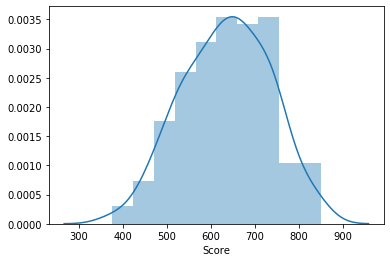

In [75]:
srn.distplot(dataset.loc[dataset['Saiu']==1]['Score'])

In [76]:
# 6-Qual o estado que mais perdeu cliente? E o que menos perdeu ?
dataset.groupby(dataset.loc[dataset['Saiu']==1]['Estado']).size()

Estado
PR    76
RS    76
SC    51
dtype: int64

In [77]:
dataset.groupby(dataset.loc[dataset['Saiu']==0]['Estado']).size()

Estado
PR    182
RS    401
SC    207
SP      4
dtype: int64